In [7]:
#Standard imports
import os
#Third party imports
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#Local imports

```
    Linear Regression Project —
    Predict weight based on height using pandas, numpy, matplotlib, scikit-learn.

    Steps covered:
    1. Load data
    2. Inspect & clean
    3. Visualize
    4. Split data
    5. Train Linear Regression model
    6. Evaluate model using MAE, MSE, RMSE, R2
    7. Plot regression line
    8. Predict new values
"""

In [8]:
df = pd.read_csv("datasets/SOCR-HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [9]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [10]:
df.shape

(25000, 3)

Checking for null values

In [11]:
print("\nMissing values:\n",df.isnull().sum())


Missing values:
 Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64


# Visualization of the data

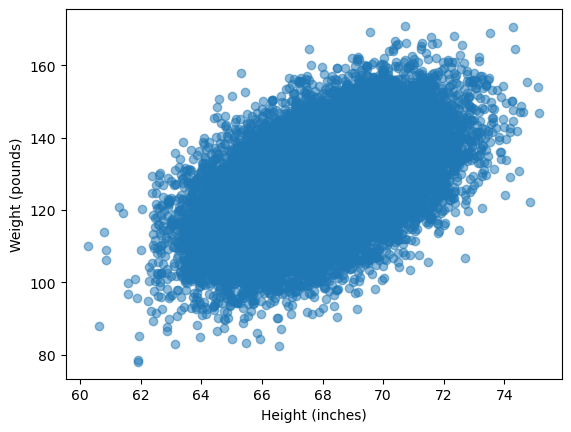

In [ ]:
# Rename columns to simpler names
df.rename(columns={"Height(Inches)": "Height", "Weight(Pounds)": "Weight"}, inplace=True)

# Now we can plot easily
plt.scatter(df["Height"], df["Weight"], alpha=0.5)
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.show()


## Histogram on the basis of height and weight

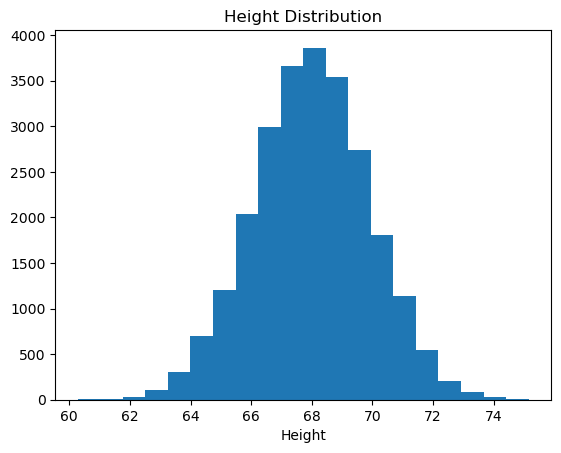

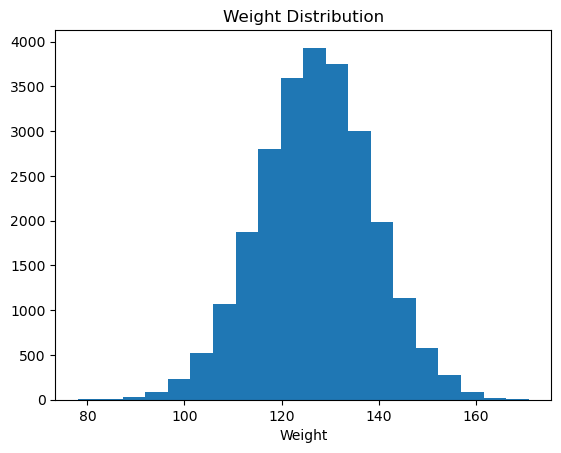

In [14]:
plt.hist(df["Height"], bins=20)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.show()

plt.hist(df["Weight"], bins=20)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.show()

### Prepare X and Y

In [17]:
X = df[["Height"]]  # 2D dataframe -> feature
y = df["Weight"]    # target variable

In [18]:
X.shape , y.shape

((25000, 1), (25000,))

# Train/Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
print(X_train.shape[0], X_test.shape[0])

20000 5000


In [23]:
from sklearn.linear_model import LinearRegression
